<a href="https://colab.research.google.com/github/vmpreciado/NETS3120/blob/main/CommunitiesGirvanNewman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we load the Zachary Karate Club network using NetworkX and perform community detection with the Girvan-Newman algorithm. The Girvan-Newman algorithm iteratively removes the edge with the highest betweenness centrality with the goal of discovering communities within the network. After applying the algorithm, we can visualize the dendrogram of communities formed and use the modularity to determine the optimal number of communities.

Step 1: Load the Zachary Karate Club Network

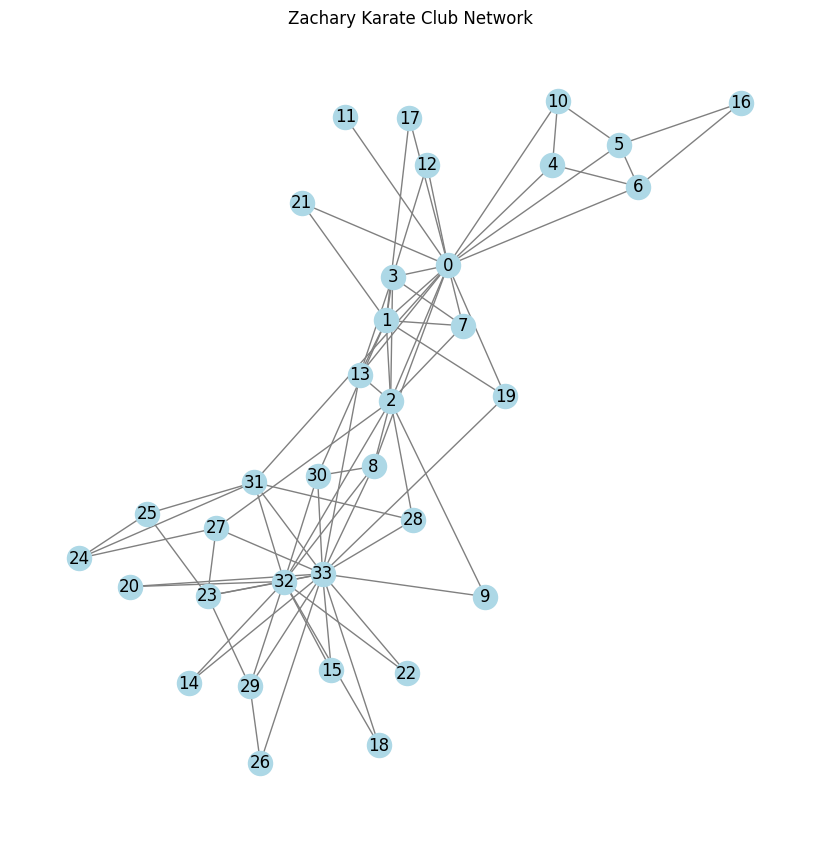

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Load the Zachary Karate Club graph
G = nx.karate_club_graph()

# Visualize the graph
plt.figure(figsize=(8, 8))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title('Zachary Karate Club Network')
plt.show()

Step 2: Apply the Girvan-Newman Algorithm

In [2]:
from networkx.algorithms.community import girvan_newman

# Apply Girvan-Newman algorithm
communities_generator = girvan_newman(G)

Visualizing a dendrogram from the Girvan-Newman algorithm in NetworkX is not as straightforward as in hierarchical clustering because NetworkX does not provide a direct way to plot dendrograms. However, we can generate and print a 'communities' variable, which is a list of community divisions generated by the Girvan-Newman algorithm. Each element in communities is a tuple of sets, where each set represents a community. Below is a code snippet that demonstrates how to iterate over the communities list and print each community division along with the nodes belonging to each community within those divisions:

In [3]:
# This variable is a list of community divisions from the Girvan-Newman algorithm
communities = list(communities_generator)

# Assuming communities is already defined
for i, division in enumerate(communities):
    print(f"Division {i+1} with {len(division)} communities:")
    for j, community in enumerate(division):
        # Convert community set to list for clearer presentation
        community_list = list(community)
        print(f"  Community {j+1}: {community_list}")
    print()  # Add a newline for better separation between divisions


Division 1 with 2 communities:
  Community 1: [0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21]
  Community 2: [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

Division 2 with 3 communities:
  Community 1: [0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21]
  Community 2: [32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
  Community 3: [9]

Division 3 with 4 communities:
  Community 1: [0, 1, 3, 7, 11, 12, 13, 17, 19, 21]
  Community 2: [32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
  Community 3: [4, 5, 6, 10, 16]
  Community 4: [9]

Division 4 with 5 communities:
  Community 1: [0, 1, 3, 7, 11, 12, 13, 17, 19, 21]
  Community 2: [2, 24, 25, 27, 28, 31]
  Community 3: [4, 5, 6, 10, 16]
  Community 4: [32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30]
  Community 5: [9]

Division 5 with 6 communities:
  Community 1: [0, 1, 3, 7, 12, 13, 17, 19, 21]
  Community 2: [2, 24, 25, 27, 28, 31]
  Community 3: [4, 5, 6, 1

Step 3: Determine the Number of Communities that Maximizes Modularity. To find the number of communities that maximizes modularity, you can iterate over the community divisions generated by the Girvan-Newman algorithm and calculate the modularity for each. Choose the division with the highest modularity.

Best Modularity: 0.3849721706864564, Number of Communities: 5


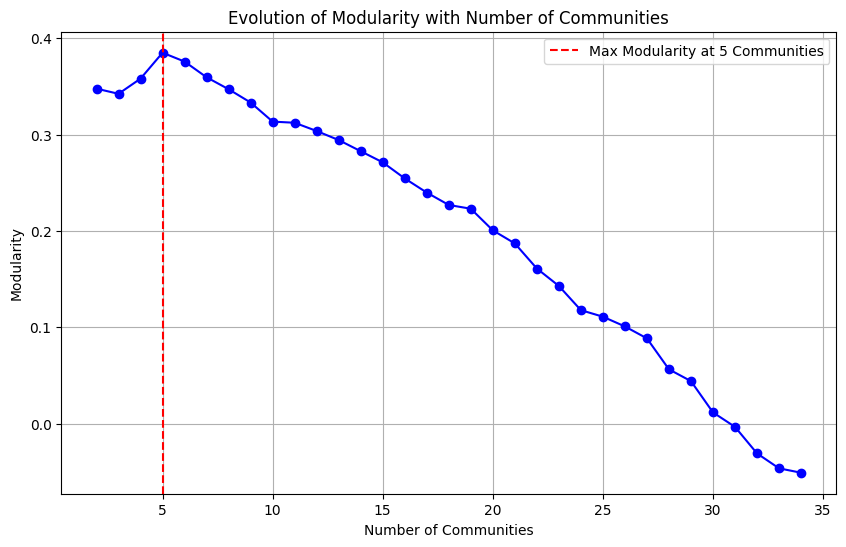

In [4]:
from networkx.algorithms.community import girvan_newman, modularity

# Assuming G is already defined as your graph

# Reset the generator
communities_generator = girvan_newman(G)

# Lists to keep track of modularity values and the number of communities
modularity_values = []
community_counts = []

# Initialize the best modularity
best_modularity = -1
best_community = None

for community in communities_generator:
    mod = modularity(G, community)
    modularity_values.append(mod)
    community_counts.append(len(community))

    if mod > best_modularity:
        best_modularity = mod
        best_community = community

# Output the best modularity and its corresponding number of communities
print(f"Best Modularity: {best_modularity}, Number of Communities: {len(best_community)}")

# Plot the evolution of modularity as a function of the number of communities
plt.figure(figsize=(10, 6))
plt.plot(community_counts, modularity_values, '-o', color='blue')
plt.xlabel('Number of Communities')
plt.ylabel('Modularity')
plt.title('Evolution of Modularity with Number of Communities')
plt.axvline(x=len(best_community), color='red', linestyle='--', label=f"Max Modularity at {len(best_community)} Communities")
plt.legend()
plt.grid(True)
plt.show()


To visualize the Zachary Karate Club network with the optimal communities highlighted in different colors, you can use the networkx library to draw the network, assigning a unique color to each community.

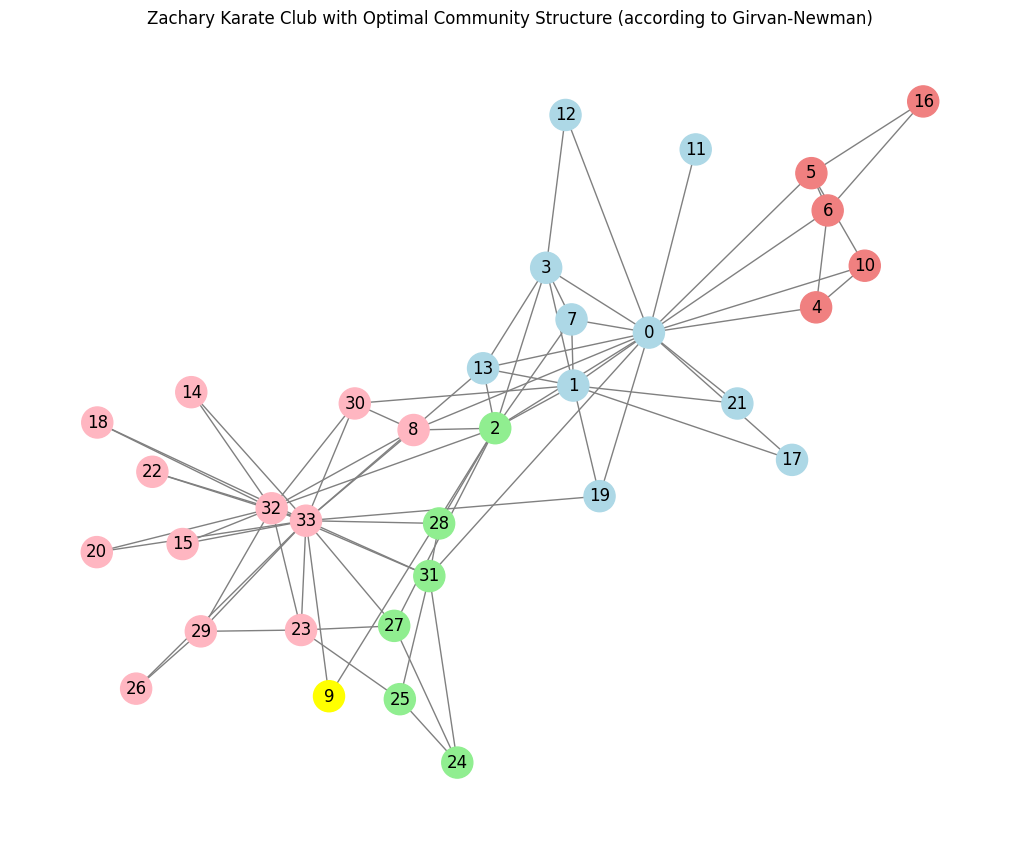

In [6]:
# Create a color map for nodes in different communities
color_map = []
community_colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'yellow']  # Add more colors if needed
node_to_community = {node: idx for idx, community in enumerate(best_community) for node in community}

for node in G:
    community_index = node_to_community[node]
    color_map.append(community_colors[community_index % len(community_colors)])

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(G, node_color=color_map, with_labels=True, node_size=500, edge_color='gray')
plt.title('Zachary Karate Club with Optimal Community Structure (according to Girvan-Newman)')
plt.show()